![Image by <a href="https://pixabay.com/users/u_f8awlsnb-12642510/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5160616">u_f8awlsnb</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5160616">Pixabay</a>](images/row-of-houses.jpg)

# King County Housing Model

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

![Editorial cartoon by David Horsey from Seattle Times](images/Dog-House.jpg)


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

The data for this project represent home sales in King County, Washington in 2014 & 2015. The dataset includes basic house information such as the number of bedrooms & bathrooms, total area of the living space (divided into basement and above ground) & the lot, and year it was built, sales information like price & number of times it was viewed, and neighborhood information, like zipcode and information about the house and lot size of the 15 nearest neighbors.

The target variable will be the sales price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

pd.set_option('display.float_format', lambda x: '%.2f'%x)
%matplotlib inline

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [5]:
#change '?' to null in sqft_basement, then change datatype to float
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = np.nan
data.sqft_basement = data.sqft_basement.astype(float)
data['sqft_basement'] = data['sqft_basement'].fillna(0)

In [6]:
#'Waterfront' is a categorical column, so change '0' to 'No', '1' to 'Yes', and 'nan' to 'unknown'
data['waterfront'] = data.loc[data['waterfront']==0, 'waterfront']= 'No'
data['waterfront'] = data.loc[data['waterfront']==1, 'waterfront']= 'Yes'
data['waterfront'] = data['waterfront'].fillna('Unknown')

In [7]:
#yr_renovated has a high number of '0's, which seems like that same as a nan, so change '0' to nan
data.loc[data['yr_renovated']== 0.0, 'yr_renovated'] = np.nan
#now only 744 rows with yr_renovated values, add new column as categorical; 
#recently renovated(last 10 years) (RR), renovated (R), not renovated (NR)
#data['renovated'] = 
data['renovated'] = np.where(data['yr_renovated']=='NaN', 'NR',
                             np.where(data['yr_renovated']<2005, 'R', 'RR'))

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null object
dtypes: float64(8), int64(11), object(

In [10]:
#look for multicolinearity in numberical columns
numerical = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
              'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'lat', 'long', 'zipcode', 'sqft_living15', 'sqft_lot15']

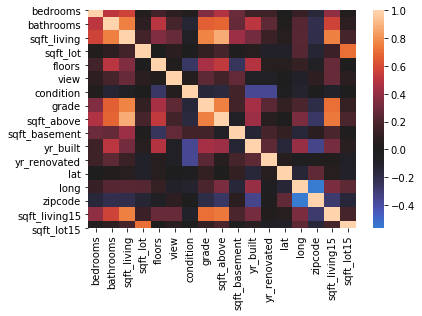

In [59]:
data_num = data[numerical]
sns.heatmap(data_num.corr(), center=0);

In [60]:
#create a df that will list the highly correlated columns                            
df=data_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]

,feature1,feature2,corr
19,bathrooms,sqft_living,0.76
35,sqft_living,bathrooms,0.76
41,sqft_living,grade,0.76
42,sqft_living,sqft_above,0.88
49,sqft_living,sqft_living15,0.76
121,grade,sqft_living,0.76
127,grade,sqft_above,0.76
138,sqft_above,sqft_living,0.88
143,sqft_above,grade,0.76
257,sqft_living15,sqft_living,0.76


sqft_living and grade highly correlate with many other features, so they will not be used.

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model!

At this point, you can also consider what a baseline, model-less prediction might look like, and begin evaluating this model compared to that baseline.

In [61]:
categoricals = ['waterfront', 'zipcode', 'renovated']
continuous = ['sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data = data[categoricals]
cont_data = data[continuous]              

In [62]:
cat_data_ohe = pd.get_dummies(cat_data, columns=categoricals, drop_first=False)

In [63]:
preprocessed = pd.concat([cat_data_ohe, cont_data], axis=1)
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [65]:
#instanciate LinearRegression
linreg = LinearRegression()

In [66]:
#fit model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
#make predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [68]:
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [69]:
print(f'Training Scores: R2 {R2_train}, Mean Absolute Error {mae_train}')
print(f'Testing Scores: R2 {R2_test}, Mean Absolute Error {mae_test}')

Training Scores: R2 0.7507467045025176, Mean Absolute Error 106410.69721325565
Testing Scores: R2 0.7498044022763584, Mean Absolute Error 109464.91585501212


### Model #2

### Model #3

There are a lot of zipcodes- the use of onehotencoding with them will likely be causing some overfitting. The main thing about zipcodes as related to housing prices, I think, is the median income of the zipcode, so I will split into categories by income.

In [22]:
#import dataset of King county zipcode and avg incomes
data2 = pd.read_csv('data/zip-income.csv')
print(data2.head())
data2.describe()

  Category (Category)  Geoname   Min. LB
0              Income    98354  67638.16
1              Income    98288  30357.80
2              Income    98224  19460.68
3              Income    98199 101181.84
4              Income    98198  60796.76


,Geoname,Min. LB
count,83.00,83.00
mean,98086.43,82812.86
std,67.49,29927.01
min,98001.00,16229.04
25%,98032.50,59973.74
50%,98072.00,83040.40
75%,98121.50,100547.82
max,98354.00,160040.80


In [55]:
# create new column "income" that categorizes income into "low", "mid-low", "mid-high" and 'high' based on quartiles
data2['income'] = np.where(data2['Min. LB']<83000, 'low', 
                          np.where((data2['Min. LB']>=83000) & (data2['Min. LB']<100000), 'medium', 
                                  np.where(data2['Min. LB'] > 120000, 'very_high', 'high')))
                                 
data2.head()

,Category (Category),Geoname,Min. LB,income
0,Income,98354,67638.16,low
1,Income,98288,30357.80,low
2,Income,98224,19460.68,low
3,Income,98199,101181.84,high
4,Income,98198,60796.76,low


In [56]:
#add the income column to the main dataset by maping zipcode to a dictionary of zipcodes and income levels
zip_income = dict(zip(data2['Geoname'],data2['income']))
data['income'] = data['zipcode'].map(zip_income)


In [57]:
# run the model using the income column instead of zipcode
categoricals = ['waterfront', 'income', 'renovated']
continuous = ['sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data = data[categoricals]
cont_data = data[continuous]     

cat_data_ohe = pd.get_dummies(cat_data, columns=categoricals, drop_first=True)

preprocessed = pd.concat([cat_data_ohe, cont_data], axis=1)
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

#instanciate LinearRegression
linreg = LinearRegression()
#fit model
linreg.fit(X_train, y_train)

#make predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Training Scores: R2 {R2_train}, Mean Absolute Error {mae_train}')
print(f'Testing Scores: R2 {R2_test}, Mean Absolute Error {mae_test}')

Training Scores: R2 0.6058942091808628, Mean Absolute Error 145086.68402713072
Testing Scores: R2 0.6035175090486464, Mean Absolute Error 149541.10448961254


In [54]:
y_data = y
X_data = X
y_dataset = y_data.values
X_dataset = X_data.values

linreg = LinearRegression()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(linreg, 20)
rfe = rfe.fit(X_dataset.data, y_dataset)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
cont_data.hist(figsize = (15, 15))
plt.show()

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze or model the data?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to do your second, more refined model

In [ ]:
# code here to iteratively improve your models

## Evaluation

Evaluate how well your work solves the stated business problem.

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How well does your model/data fit any modeling assumptions?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

Please note - you should be evaluating each model as you move through, and be sure to evaluate your models consistently.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
